# Проект.   Изучение рынка компьтерных игр и перспективных платформ за 2016 год

<b>Целью проекта является выявление закономерностей, определяющих успех компьютерной игры на различных платформах с перспективой построения успешной рекламной компании, а так же определения трендов на рынке на 2017 год.</b>

<style>
ul li ul li {
    margin-left: 10px;
    list-style-type: circle;
}
</style>

<a id='top'></a>
<h1>Содержание</h1>
<ul>
<li><a href="#section1">1. Изучим данные</a></li>
<li><a href="#section2">2. Предобработка данных</a></li>
<li><a href="#section3">3. Исследовательский анализ данных</a>
    <ul><li><a href="#subheading1">Сколько игр выпускалось в разные годы</a></li></ul>
    <ul><li><a href="#subheading2">Продажи по платформам</a></li></ul>
    <ul><li><a href="#subheading3">Продажи по популярным платформам</a></li></ul>
    <ul><li><a href="#subheading4">Анализ PS4</a></li></ul>
    <ul><li><a href="#subheading5">Зависимость продаж от отзывов на всех популярнх платформах</a></li></ul>
    <ul><li><a href="#subheading6">Распределение игр по жанрам</a></li></ul>
     
</li>
<li><a href="#section4">4. Потрет пользователя по регионам</a></li>
<li><a href="#section5">5. Проверка гипотез</a></li>
<li><a href="#section6">6. Общий вывод</a></li>
</ul>

# Изучим данные
<a id='section1'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

У нас в распоряжении датасет с данными до 2016 года. Подобный анализ возможно проводить и для других лет, алгоритм универсален.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import scipy.stats

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# Предобработка данных
<a id='section2'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

In [7]:
#заменим названия столбцов (приведем к нижнему регистру)
df.columns = df.columns.str.lower()
#проверим замену
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
#заменим типы данных
#год - всегда целое значение
df['year_of_release'] = df['year_of_release'].astype(pd.Int64Dtype())

In [9]:
#рейтинг пользователей  - преобразуем в тип Float, при попытке преобразовать тип появилось значение 'tbd',
#рассмотрим детально что это такое 
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [11]:
# заменим значения на nan
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [12]:
#конвертируем в тип float
df['user_score'] = df['user_score'].astype('float')

In [13]:
#заполним пропуски в столбце рейтинга пользователя нулями
df['user_score'] = df['user_score'].fillna(0)

In [14]:
#заполним пропуски в столбце рейтинга критиков нулями
df['critic_score'] = df['critic_score'].fillna(0)

In [15]:
#заполним пропуски в столбце возрастного рейтинга нулями
df['rating'] = df['rating'].fillna('no_rating')

<div class="alert-success"> 

Рейтинг ползователей и рейтинг критиков достаточно изменчивое поннятие, одна и та же игра на разных игровых платформах может иметь диаметрально противоположные рейтинги.   
 </div>

Заменим все пропуски на нули, чтобы не потерять остальные данные. Заменять данные средними значениями нет никакого смысла. Возрастной рейтинг поменяем на значение-заглушку "no_rating"   

In [16]:
#посомтрим на пропуски в названии
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0.0,0.0,no_rating
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0.0,0.0,no_rating


In [17]:
#два пропуска в названии и жанре,а так же в играх с отсутствующим годом выпуска
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [20]:
#посчитаем сумаррные продажи во всех регионах и запишем их в отдельны столбец
df['total_sales'] = df['na_sales'] + \
df['eu_sales'] + \
df['jp_sales'] + \
df['other_sales']

# Исследовательский анализ данных
<a id='section3'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

## Изучим, сколько игр выпускалось в разные годы
<a id='subheading1'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

In [21]:
games_per_year = df.groupby(['year_of_release']).agg(qty=('year_of_release','count'))

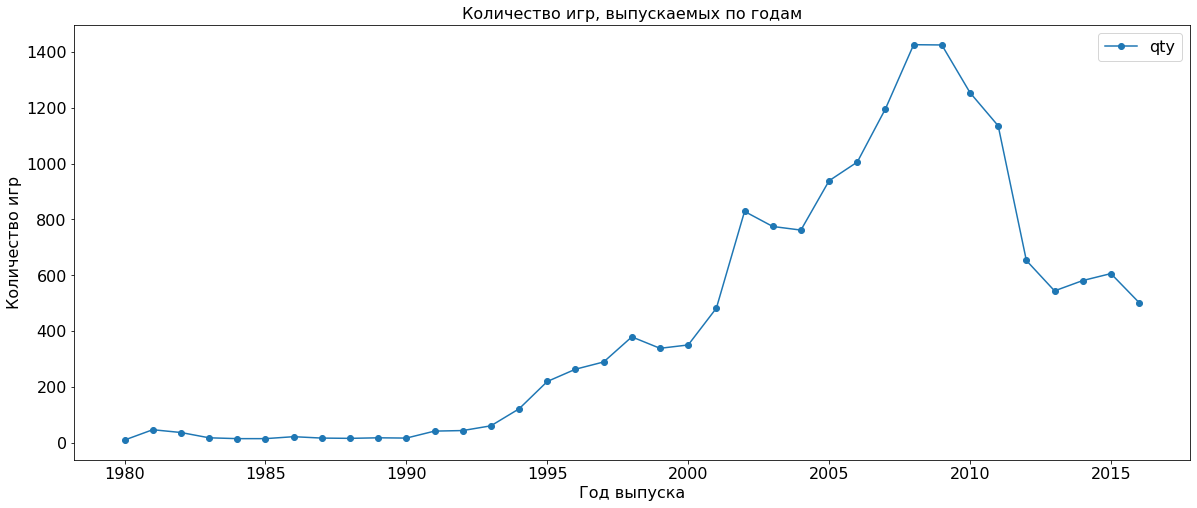

In [22]:
games_per_year.plot(figsize=(20,8), marker  = "o", fontsize = 16)
plt.xlabel('Год выпуска', fontsize = 16)
plt.ylabel('Количество игр',fontsize = 16)
plt.title('Количество игр, выпускаемых по годам',fontsize = 16 )
plt.legend(fontsize = 16)
plt.show()

<div class="alert-success"> 

Данные за все периоды не важны, так как тенденции, способ разработки и способ потребления игр у пользователей меняется очень стремительно, актуальными данными можно считать период с 2012 года, когда мы имеем "плато"    </div>

## Продажи по платформам
<a id='subheading2'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Изучим, за какой характерный срок появляются новые и исчезают старые платформы.

In [23]:
#найдем платформы с наибольшими сумарными продажами
top_platforms = (df.groupby(['platform']).
                 agg(sales = ('total_sales','sum')).
                 sort_values(by = 'sales', ascending = False)
                )

In [24]:
#выведем распределение платформ по годам
platforms_by_years = df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min','max']).reset_index()
platforms_by_years.columns = ['platform', 'first_year', 'last_year']

In [25]:
platforms_by_years.sort_values(by = 'first_year')

,platform,first_year,last_year
0,2600,1980,1989
11,NES,1983,1994
4,DS,1985,2013
13,PC,1985,2016
5,GB,1988,2001
23,SNES,1990,1999
8,GEN,1990,1994
9,GG,1992,1992
22,SCD,1993,1994
12,NG,1993,1996


In [26]:
#выведем топ платформ на экран
top_platforms.head(5)

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [27]:
platforms_by_years['years_of_existance'] = platforms_by_years['last_year'] - platforms_by_years['first_year']

In [28]:
platforms_by_years.sort_values(by = 'first_year')

,platform,first_year,last_year,years_of_existance
0,2600,1980,1989,9
11,NES,1983,1994,11
4,DS,1985,2013,28
13,PC,1985,2016,31
5,GB,1988,2001,13
23,SNES,1990,1999,9
8,GEN,1990,1994,4
9,GG,1992,1992,0
22,SCD,1993,1994,1
12,NG,1993,1996,3


<div class="alert-success"> 
Про жизненный цикл платформы можно сделать практически однозначный вывод, все популярные игровые платформы живут порядка 10 лет. </div>

## Проанализируем продажи по популярным платформам по годам PS2, X360, PS3, Wii, DS
<a id='subheading3'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

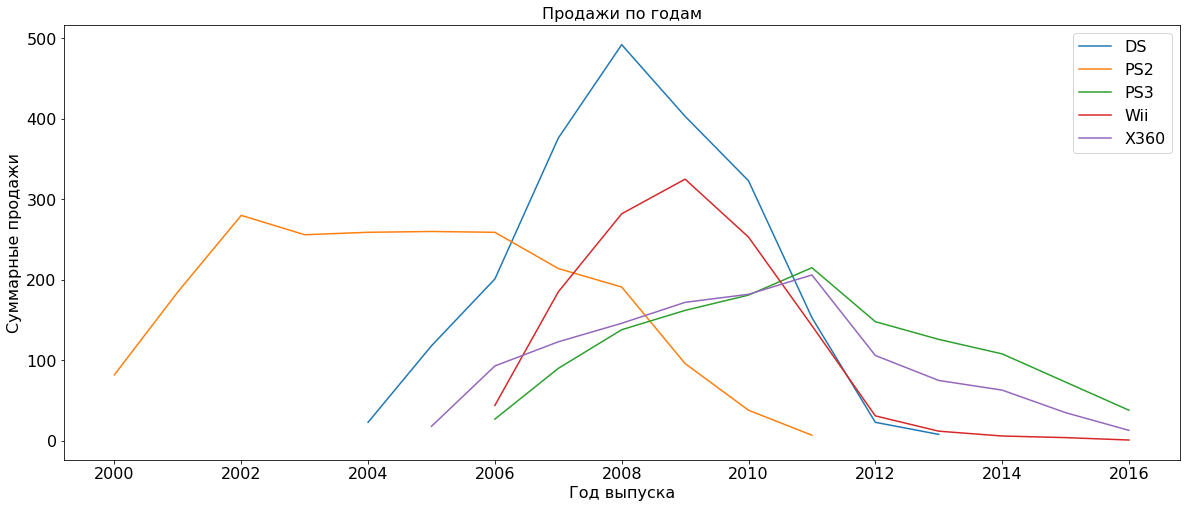

In [29]:
df.query('platform == ["PS2", "X360", "PS3", "Wii", "DS"] & year_of_release > 1999').\
pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'count').\
plot(figsize=(20,8), fontsize = 16)
plt.xlabel('Год выпуска', fontsize = 16)
plt.ylabel('Суммарные продажи',fontsize = 16)
plt.title('Продажи по годам',fontsize = 16 )
plt.legend(fontsize = 16)
plt.show()

Возьмем данные за соответствующий актуальный период. Актуальный период будем считать с 2011 года, так как жизненный цикл платформ выпущенных начиная с этого периода ещё не закончился.

In [30]:
#создадим новый датафрейм с актуальной ифнормацией по платформам

actual_data = df.query('year_of_release >= 2014')
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,no_rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,0.0,0.0,no_rating,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,no_rating,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [31]:
global_sales = actual_data.groupby(['platform']).\
agg(sales = ('total_sales','sum')).\
sort_values(by = 'sales', ascending = False)
global_sales

,sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


<div class="alert-success"> 
Лидерами продаж акутального периода можно выбрать PS4,3DS,XOne,PC

Определим, какие платформы растут по продажам а какие падают, и определим потенциально прибыльные платформы


In [32]:
global_sales_by_years = (actual_data.pivot_table(index = 'platform', 
                                                 columns = 'year_of_release', 
                                                 values = 'total_sales', 
                                                 aggfunc = 'count')
                        )
global_sales_by_years

year_of_release,2014,2015,2016
platform,,,
3DS,80.0,86.0,46.0
PC,47.0,50.0,54.0
PS3,108.0,73.0,38.0
PS4,75.0,137.0,164.0
PSP,10.0,3.0,NaN
PSV,100.0,110.0,85.0
Wii,6.0,4.0,1.0
WiiU,31.0,28.0,14.0
X360,63.0,35.0,13.0


<div class="alert-success"> 
Проанализировав информацию по продажам, можно сделать вывод что потенциалоьно прибыльными платформами будут
PC, PS4, XOne, так как только эти платформы имеют восходящий тренд продаж, так же возможно стоит сделать ставку на 3DS, так как она показывает стабтльные продажи, пускай и в снижающемся тренде. </div>

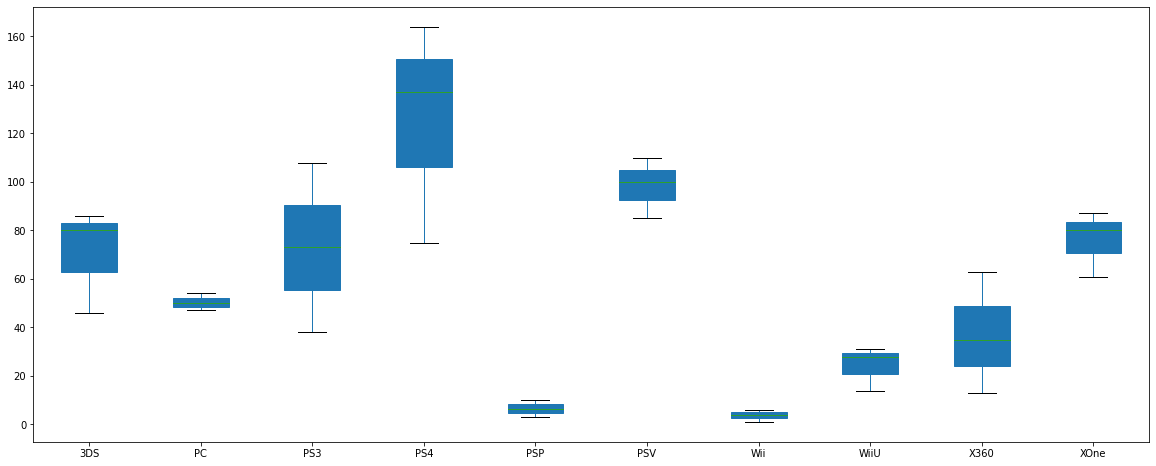

In [33]:
#построим диаграмму размаха
global_sales_by_years = (actual_data.pivot_table(index = 'year_of_release', 
                                                 columns = 'platform', 
                                                 values = 'total_sales', 
                                                 aggfunc = 'count').
                         boxplot(figsize =(20,8), patch_artist=True, grid=False)
                        )

## Анализ PS4
<a id='subheading4'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для анализа возьмём самую популарную платформу PS4.На ее примере проверим как связаны продажи игр в зависимости от отзывов

In [34]:
ps4 = actual_data.query('platform == "PS4" & user_score != 0 ')
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,no_rating,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


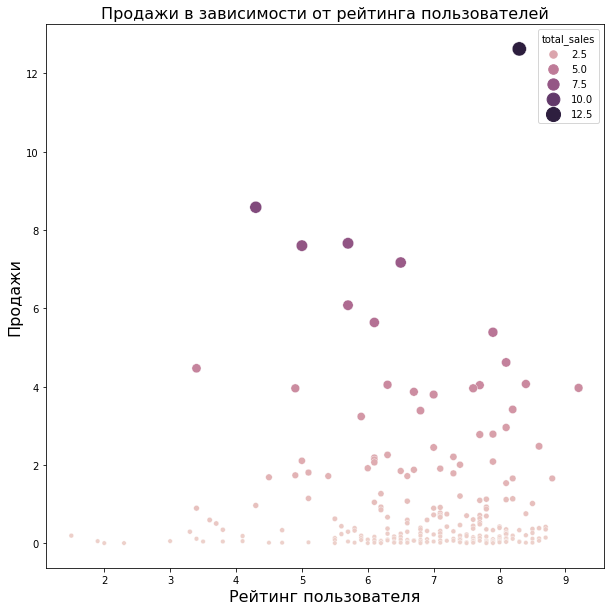

In [35]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = ps4, 
                x = 'user_score', 
                y = 'total_sales',
                size = 'total_sales', 
                hue = 'total_sales', 
                sizes=(20, 200))
plt.xlabel('Рейтинг пользователя', fontsize = 16)
plt.ylabel('Продажи',fontsize = 16)
plt.title('Продажи в зависимости от рейтинга пользователей',fontsize = 16 )
plt.show()

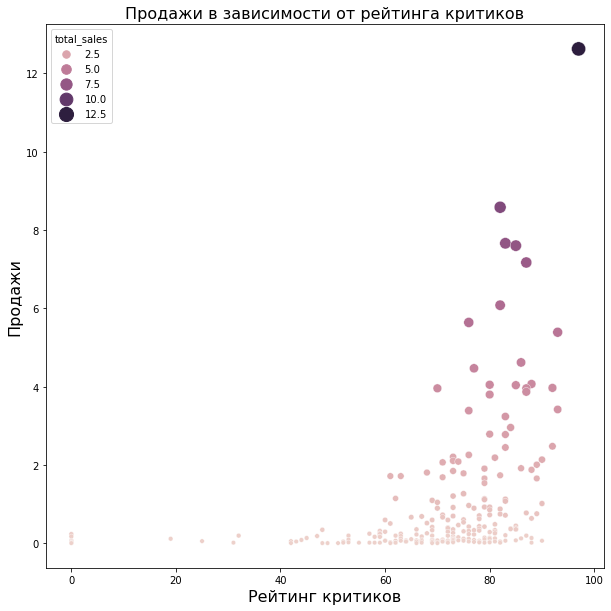

In [36]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = ps4, 
                x = 'critic_score', 
                y = 'total_sales',
                size = 'total_sales', 
                hue = 'total_sales', 
                sizes=(20, 200))
plt.xlabel('Рейтинг критиков', fontsize = 16)
plt.ylabel('Продажи',fontsize = 16)
plt.title('Продажи в зависимости от рейтинга критиков',fontsize = 16 )
plt.show()

<div class="alert-success"> 

Зависимости продаж от рейтинга пользователей не наблюдается, хорошие результаты показывают игры и с низкими пользовательскими рейтингами, однако в случае с оценкой критиков, дела обстоят иначе, почти нет игр с высокими продажами, которые низко оценили критики. </div>

In [37]:
ps4['critic_score'].corr(ps4['total_sales'])

0.34140356191608023

In [38]:
ps4['user_score'].corr(ps4['total_sales'])

-0.040131589472697356

## Зависимость продаж от отзывов на всех популярнх платформах 
<a id='subheading5'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

In [39]:
#напишем функцию для расчёта кореляции по палтформам
def cor (data):
    for i in actual_data['platform'].unique():
        fx = actual_data.query('platform == @i')
        print('Кореляция оценки пользователей',i,':', fx.user_score.corr(fx.total_sales))
        print('Кореляция оценки критиков',i,':', fx.critic_score.corr(fx.total_sales))
        print()

In [40]:
cor(actual_data)

Кореляция оценки пользователей PS4 : 0.10144814376783853
Кореляция оценки критиков PS4 : 0.2118368183044837

Кореляция оценки пользователей 3DS : 0.05492175714040346
Кореляция оценки критиков 3DS : 0.05325522817191302

Кореляция оценки пользователей XOne : 0.10207401748014336
Кореляция оценки критиков XOne : 0.27251772512134903

Кореляция оценки пользователей WiiU : 0.2646313950420228
Кореляция оценки критиков WiiU : 0.29222225366893145

Кореляция оценки пользователей PS3 : 0.19669962340037422
Кореляция оценки критиков PS3 : 0.02390708896046414

Кореляция оценки пользователей X360 : 0.071266511310844
Кореляция оценки критиков X360 : 0.004687018080577021

Кореляция оценки пользователей PC : 0.061709354418852926
Кореляция оценки критиков PC : 0.18431151197970436

Кореляция оценки пользователей Wii : 0.7877830657240429
Кореляция оценки критиков Wii : nan

Кореляция оценки пользователей PSV : 0.2752875270324686
Кореляция оценки критиков PSV : 0.2439013566877441

Кореляция оценки пользовате

<div class="alert-success"> 

Наиболее сильная кареляция между отзывами и продажами у Wii

## Посмотрим на общее распределение игр по жанрам. Определим самые прибыльные жанры. Выделяются ли жанры с высокими и низкими продажами?
<a id='subheading6'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

In [41]:
genre_sales_median = actual_data.groupby(['genre']).\
agg(sales = ('total_sales','median')).\
sort_values(by = 'sales', ascending = False)
genre_sales_median = genre_sales_median.reset_index()

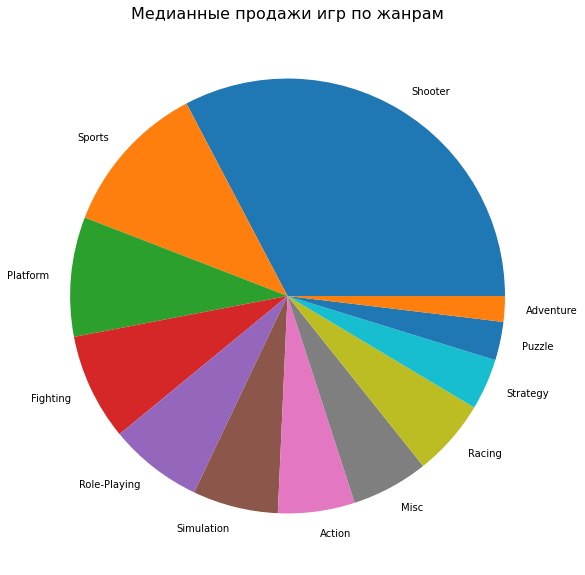

In [42]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.pie(genre_sales_median['sales'],labels =genre_sales_median['genre'])
plt.title('Медианные продажи игр по жанрам',fontsize = 16 )
plt.show()

In [43]:
genre_sales_mean = actual_data.groupby(['genre']).\
agg(sales = ('total_sales','mean')).\
sort_values(by = 'sales', ascending = False)
genre_sales_mean = genre_sales_mean.reset_index()

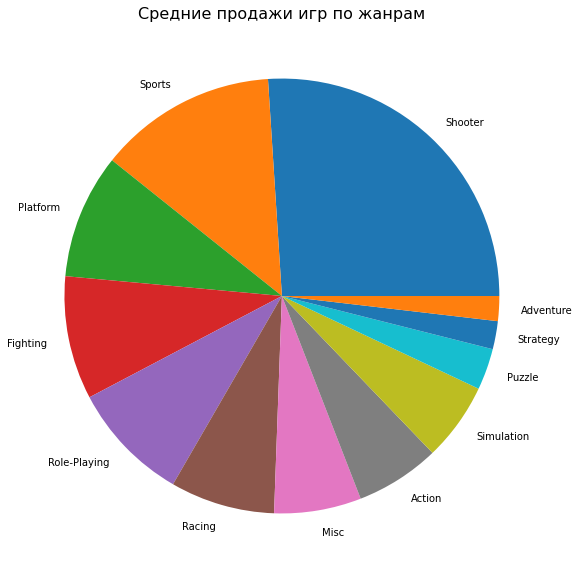

In [44]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.pie(genre_sales_mean['sales'],labels =genre_sales_mean['genre'])
plt.title('Средние продажи игр по жанрам',fontsize = 16 )
plt.show()

In [45]:
genre_qty = actual_data.groupby(['genre']).\
agg(number_of_games = ('total_sales','sum')).\
sort_values(by = 'number_of_games', ascending = False)
genre_qty = genre_qty.reset_index()

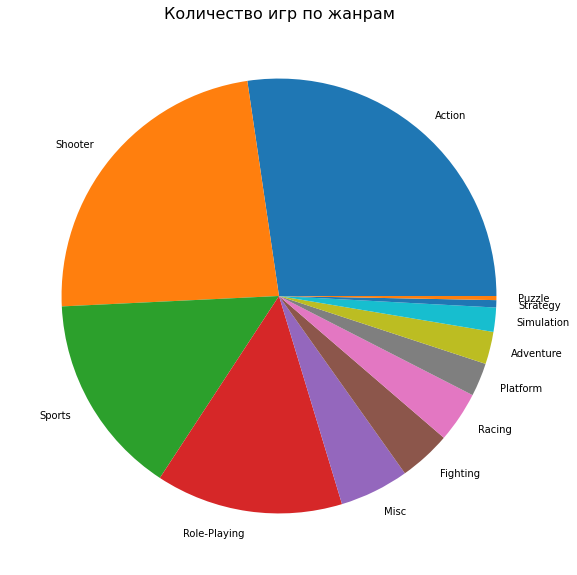

In [46]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.pie(genre_qty['number_of_games'],labels = genre_qty['genre'])
plt.title('Количество игр по жанрам',fontsize = 16 )
plt.show()

<div class="alert-success"> 

Жанрами,которые стабильно приносят высокий доход яаляются шутер, спортивные симуляторы и платформеры. Жанры с самым низким доходом - приключения, стратегия и пазл. Экшн и шутер являются самыми массовыми ко поличеству игр жанрами.

# Составим потрет пользователя по регионам
<a id='section4'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

 Определим для пользователей каждого региона(NA, EU, JP):

    -Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    -Самые популярные жанры (топ-5). 
    -Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [47]:
#найдем тоа 5 платформ и жанров для EU
display(actual_data.pivot_table(index = 'platform', 
                        values = 'eu_sales',
                        aggfunc = 'sum').\
            sort_values(by = 'eu_sales', ascending = False).head(5))

actual_data.pivot_table(index = 'genre', 
                        values = 'eu_sales',
                        aggfunc = 'sum').\
            sort_values(by = 'eu_sales', ascending = False).head(5)


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


<div class="alert-success"> 

Популярными платформами в европе традиционно яаляются консоли семейства PS, популярные жанры - Экшн, Шутер и Спортивные симуляторы

In [48]:
#аналогично найдем топ 5 для NA
display(actual_data.pivot_table(index = 'platform', 
                        values = 'na_sales',
                        aggfunc = 'sum').\
            sort_values(by = 'na_sales', ascending = False).head(5))

actual_data.pivot_table(index = 'genre', 
                        values = 'na_sales',
                        aggfunc = 'sum').\
            sort_values(by = 'na_sales', ascending = False).head(5)


,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


<div class="alert-success"> 

На рынке северной америки лидирует PS4, но разрыв с XBOX тут не такой уж и большой. У Xbox есть все шансы занять лидируещие позиции. популярные жанры - Экшн, Шутер и Спортивные симуляторы

In [49]:
#аналогично найдем топ 5 для JP
display(actual_data.pivot_table(index = 'platform', 
                        values = 'jp_sales',
                        aggfunc = 'sum').\
            sort_values(by = 'jp_sales', ascending = False).head(5))

actual_data.pivot_table(index = 'genre', 
                        values = 'jp_sales',
                        aggfunc = 'sum').\
            sort_values(by = 'jp_sales', ascending = False).head(5)


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


<div class="alert-success"> 

Рынок Японии всегда был самобытным, пользовательские предпочтения очень сильно отличаются от других регионов. Значительную долю рынка занимают консоли нинтендо, в частности портатианая консоль 3DS, что в свою очередь сильно сказывается на игровых предпочтениях пользователей,тройка жанровых лидеров отличается от Европы и Севрерной Америки, лидируюшую позицию тут занимают роливые игры и экшн.

In [50]:
#теперь посомтрим как влияет рейтинг ESRB на продажи в отдельных регионах
esrb_sales = actual_data.query('rating != 0').\
            groupby(['rating']).\
            agg(EU=('eu_sales','sum'), 
                US = ('na_sales','sum'), 
                JP = ('jp_sales','sum'))
esrb_sales['Total'] = esrb_sales['EU']+esrb_sales['US']+esrb_sales['US']
esrb_sales.sort_values(by = 'Total', ascending = False)

,EU,US,JP,Total
rating,,,,
M,93.44,96.42,8.01,286.28
no_rating,58.95,64.72,56.90,188.39
E,58.06,50.74,8.94,159.54
T,34.07,38.95,14.78,111.97
E10+,26.16,33.23,4.46,92.62


<div class="alert-success"> 

Рейтинг продаж игр в Европе и Северноей Америке совпадает лидерами продаж являются игры с рейтингом M, то есть игры для взрослой аудитории 17+, на втором месте идут продажи игр для всех возрастов, традиционно в аутсайдерах находятся игры для подростков. И в этом срезе выделяется Япония. В Японии выделяются игры с отсутствущим рейтингом, так как япония использует свою систему рейтингов.

# Проверка гипотез
<a id='section5'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы

H0:Средние пользовательские рейтинги платформ Xbox One и PC равны

HA:Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [51]:
user_rating_xbox = actual_data.query('platform == "XOne"').loc[:,['user_score']]
user_rating_pc = actual_data.query('platform == "PC"').loc[:,['user_score']]

alpha = .05
results = scipy.stats.ttest_ind(user_rating_xbox, user_rating_pc, equal_var = False)
 
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print ('отвергаем нулевую гипотезу')
else:
    print ('не получилось отвергнуть нулевую гипотезу')

p-value: [0.31981092]
не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы

H0:Средние пользовательские рейтинги жанров Action и Sports равны

HA:Средние пользовательские рейтинги жанров Action и Sports не равны

In [53]:
action_rating_xbox = actual_data.query('genre == "Action"').loc[:,['user_score']]
user_rating_pc = actual_data.query('genre == "Sports"').loc[:,['user_score']]

alpha = .05
results = scipy.stats.ttest_ind(user_rating_xbox, user_rating_pc, equal_var = False)
 
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print ('отвергаем нулевую гипотезу')
else:
    print ('не получилось отвергнуть нулевую гипотезу')

p-value: [0.03035028]
отвергаем нулевую гипотезу


<div class="alert-success"> 

Для проврерки гипотез я выбрал уровень значимости равный 5%. Значение уровня значимости обозначил за Alpha. Это достаточный уровень значимости для проверки гипотез, так как большой уровень значимости дает большую уверенность в истинности альтернативной гипотезы. Но при этом возрастает риск не отвергнуть ложную нулевую гипотезу. В нашем случае 5% достаточно. 

Поскольку нам неоходимо сравнить средние значения двух выборок не связаных между собой мы использовали T тест стьюдента, тесты делаем с параметром equal_var = False, так как наши выборки не равны между собой.


# Общий вывод 
<a id='section6'></a>
<ul>
<a href="#top">К содержанию</a>
</ul>

Игровые предпочтения Европы и Северной америки очень похожи, люди на 2 континентах выбирают одинаековые жанры в играх, но в плане платформ предпочтения пользователей совершенно разные, в Европе предпочитают PS в Северной Америке XBOX. Особняком стоит Япония, рынок японии очень сильно отличается от рынков EU и NA, здесь сформировалась своя самобытная культура потребления игрового контента здесь популярны совершенно другие жанры, а так же особой популярностью пользуются консоли Nintendo. в Японии пользователи предпочитают инди игры.

Делая общий вывод хочу скаать что основную ставку стоит делать на консоли нового поколения Xbox и PS, так же не стоит забывать об альтернативах вроде Nintendo и PC